In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# View top 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check dataset shape and info
print("Shape:", df.shape)
print("\nData Types:\n")
print(df.dtypes)

# Check null values
print("\nMissing Values:\n")
print(df.isnull().sum())


Shape: (7043, 21)

Data Types:

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract          

In [4]:
# Replace spaces with NaN in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Verify cleaning
print("After Cleaning:\n")
print(df.info())


After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

In [5]:
# Target variable
target = 'Churn'

# Convert target to binary
df[target] = df[target].map({'Yes': 1, 'No': 0})

# Separate categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", list(cat_cols))
print("Numerical Columns:", list(num_cols))


Categorical Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [6]:
# Label encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


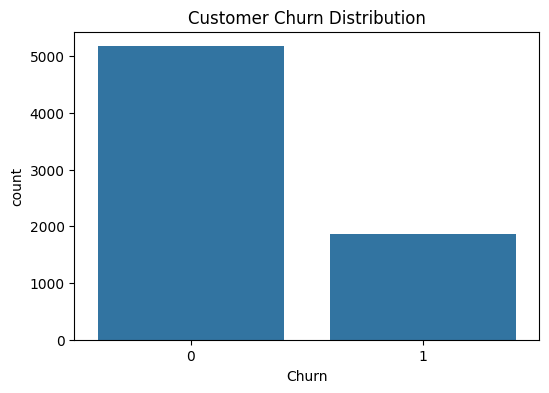

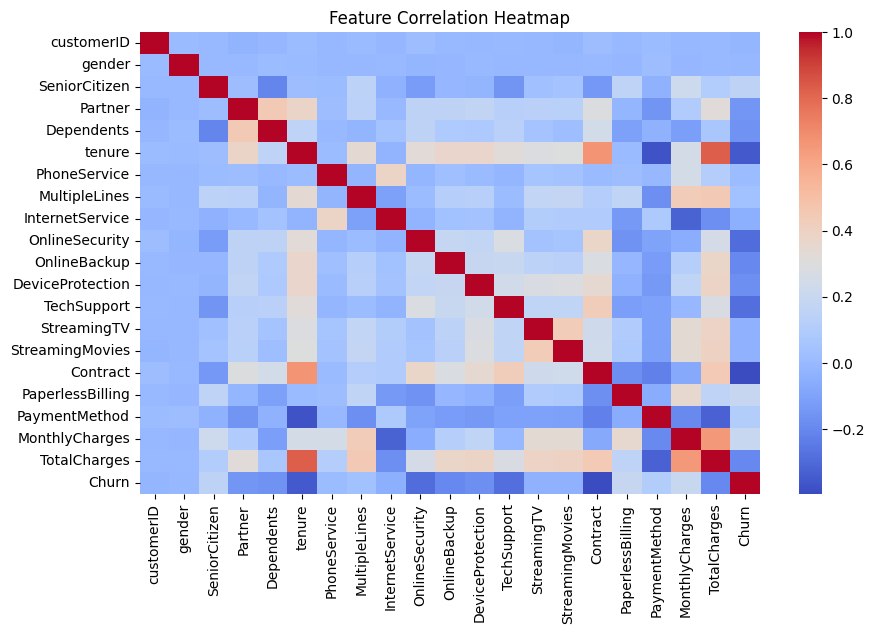

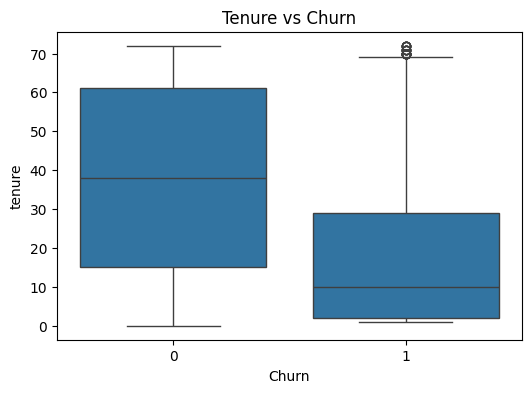

In [7]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

# Tenure vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()


In [9]:
# Define X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = [col for col in num_cols if col != 'Churn']

# Then scale numeric features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [10]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# CHAID-like Decision Tree
chaid_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
chaid_model.fit(X_train, y_train)

# Predict
y_pred_chaid = chaid_model.predict(X_test)

# View tree rules
rules = export_text(chaid_model, feature_names=list(X.columns))
print(rules)


|--- Contract <= 0.50
|   |--- OnlineSecurity <= 0.50
|   |   |--- tenure <= -0.90
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- InternetService >  0.50
|   |   |   |   |--- class: 1
|   |   |--- tenure >  -0.90
|   |   |   |--- InternetService <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- InternetService >  0.50
|   |   |   |   |--- class: 0
|   |--- OnlineSecurity >  0.50
|   |   |--- MonthlyCharges <= 0.88
|   |   |   |--- tenure <= -1.18
|   |   |   |   |--- class: 0
|   |   |   |--- tenure >  -1.18
|   |   |   |   |--- class: 0
|   |   |--- MonthlyCharges >  0.88
|   |   |   |--- TotalCharges <= 0.27
|   |   |   |   |--- class: 1
|   |   |   |--- TotalCharges >  0.27
|   |   |   |   |--- class: 0
|--- Contract >  0.50
|   |--- MonthlyCharges <= 0.96
|   |   |--- Contract <= 1.50
|   |   |   |--- StreamingMovies <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- StreamingMovies >  1.50
|   |   |   |   |--- class: 0
|   |   |---

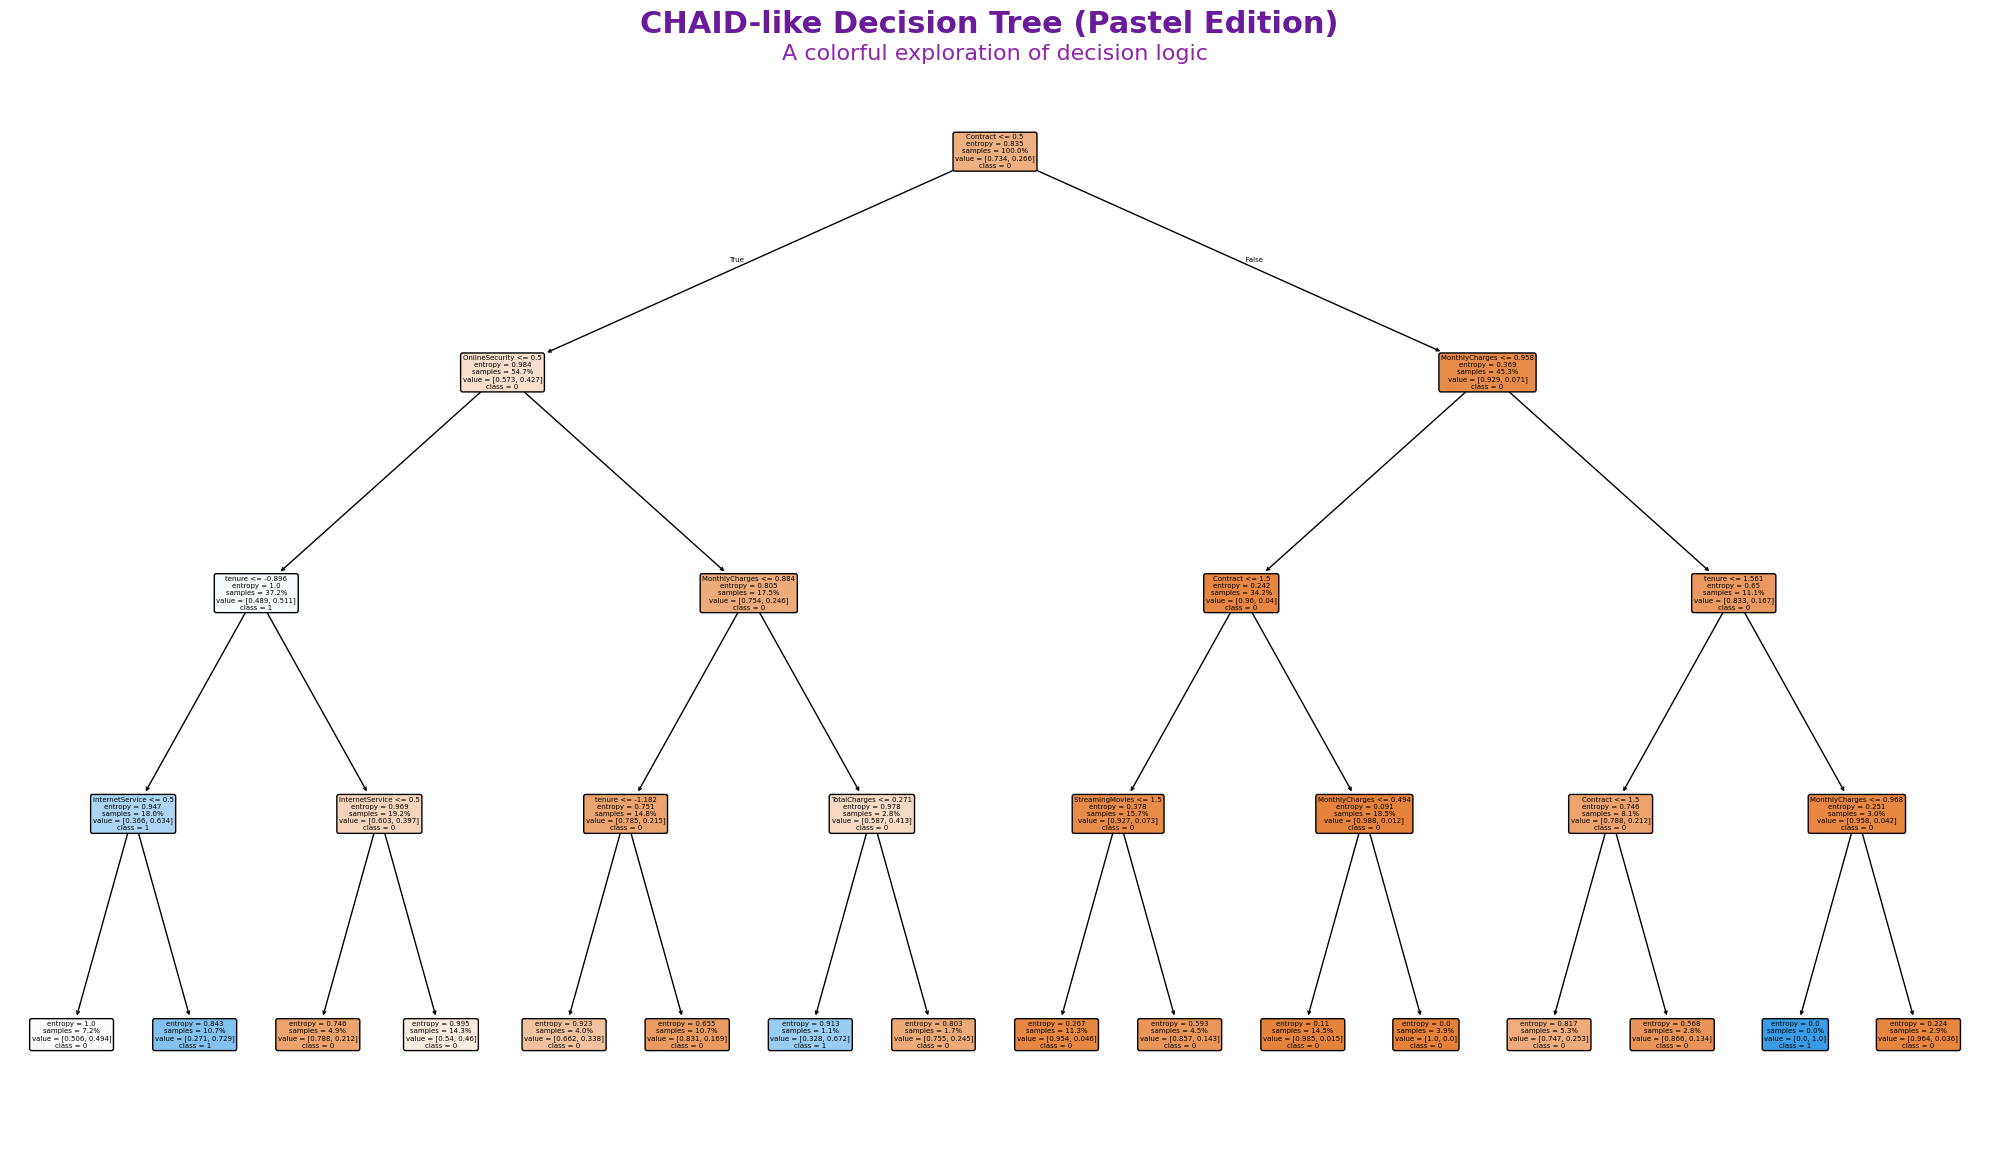

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming chaid_model and X_train, y_train are already defined
plt.figure(figsize=(20, 12))

# Create a pastel color palette for nodes
colors = plt.cm.Pastel1.colors

plot_tree(
    chaid_model,
    feature_names=list(X_train.columns),
    class_names=[str(c) for c in chaid_model.classes_],
    filled=True,
    rounded=True,
    impurity=True,
    proportion=True,
)

# Enhance the look with artistic style
plt.title("CHAID-like Decision Tree (Pastel Edition) ", fontsize=22, fontweight='bold', color='#6A1B9A')
plt.suptitle("A colorful exploration of decision logic", fontsize=16, color='#8E24AA', y=0.93)
plt.axis('off')
plt.tight_layout()
plt.show()



In [11]:
acc_chaid = accuracy_score(y_test, y_pred_chaid)
roc_chaid = roc_auc_score(y_test, chaid_model.predict_proba(X_test)[:,1])

print("CHAID Model Accuracy:", round(acc_chaid, 3))
print("CHAID Model ROC-AUC:", round(roc_chaid, 3))

print("\nClassification Report:\n", classification_report(y_test, y_pred_chaid))


CHAID Model Accuracy: 0.795
CHAID Model ROC-AUC: 0.834

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87      1036
           1       0.74      0.34      0.47       373

    accuracy                           0.79      1409
   macro avg       0.77      0.65      0.67      1409
weighted avg       0.79      0.79      0.77      1409



In [12]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])

print("Logistic Regression Accuracy:", round(acc_lr, 3))
print("Logistic Regression ROC-AUC:", round(roc_lr, 3))


Logistic Regression Accuracy: 0.816
Logistic Regression ROC-AUC: 0.862


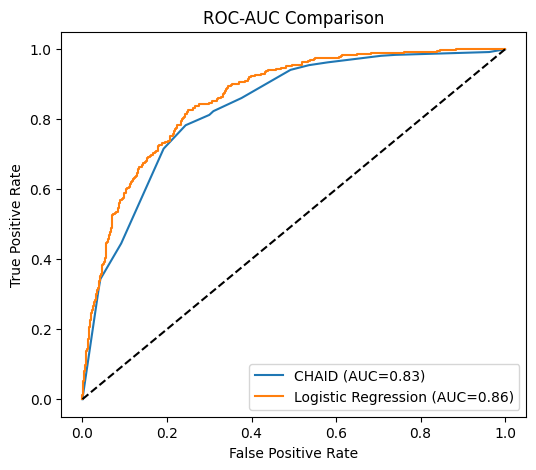

In [13]:
fpr1, tpr1, _ = roc_curve(y_test, chaid_model.predict_proba(X_test)[:,1])
fpr2, tpr2, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6,5))
plt.plot(fpr1, tpr1, label=f'CHAID (AUC={roc_chaid:.2f})')
plt.plot(fpr2, tpr2, label=f'Logistic Regression (AUC={roc_lr:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Comparison')
plt.legend()
plt.show()


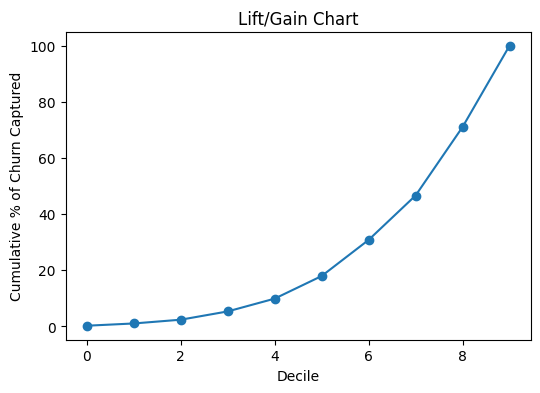

In [14]:
# Compute predicted probabilities
pred_probs = lr_model.predict_proba(X_test)[:, 1]

# Create dataframe for lift chart
lift_df = pd.DataFrame({'prob': pred_probs, 'true': y_test})
lift_df = lift_df.sort_values(by='prob', ascending=False)
lift_df['decile'] = pd.qcut(lift_df['prob'], 10, labels=False)

# Calculate lift
lift_summary = lift_df.groupby('decile')['true'].agg(['count','sum'])
lift_summary['cumulative'] = lift_summary['sum'].cumsum()
lift_summary['gain'] = 100 * lift_summary['cumulative'] / lift_summary['sum'].sum()

plt.figure(figsize=(6,4))
plt.plot(lift_summary.index, lift_summary['gain'], marker='o')
plt.title('Lift/Gain Chart')
plt.xlabel('Decile')
plt.ylabel('Cumulative % of Churn Captured')
plt.show()


In [16]:
# Save best model (Logistic Regression) using Pickle
with open('best_churn_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Example: Loading and predicting
with open('best_churn_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

sample = X_test.iloc[0:1]
pred = loaded_model.predict(sample)
print("Predicted churn:", pred[0])


Predicted churn: 1


In [17]:
# Example function to retrain model on new data
def update_model(new_data_path):
    new_df = pd.read_csv(new_data_path)
    new_df['TotalCharges'] = new_df['TotalCharges'].replace(" ", np.nan).astype(float)
    new_df['TotalCharges'].fillna(new_df['TotalCharges'].median(), inplace=True)
    new_df['Churn'] = new_df['Churn'].map({'Yes': 1, 'No': 0})

    for col in cat_cols:
        new_df[col] = le.fit_transform(new_df[col])

    X_new = new_df.drop('Churn', axis=1)
    y_new = new_df['Churn']

    lr_model.fit(X_new, y_new)
    pickle.dump(lr_model, open('updated_churn_model.pkl', 'wb'))
    print("Model updated and saved as 'updated_churn_model.pkl'")

# Example (uncomment when you have new data)
# update_model("new_churn_data.csv")


In [18]:
print("✅ Project Summary:")
print(f"CHAID Model AUC: {roc_chaid:.3f}")
print(f"Logistic Regression AUC: {roc_lr:.3f}")
print("\nLogistic Regression selected as final model for deployment.")


✅ Project Summary:
CHAID Model AUC: 0.834
Logistic Regression AUC: 0.862

Logistic Regression selected as final model for deployment.
